<h1>Code for visualization</h1>

In this notebook we gather the code used for 2 types of visualization:

-A connectogram, showing a comparison of graph structural connectivity between patients and controls. From all 76 nodes, we have decided to include only the 54 nodes that yield a significant difference in their graph strength measure. Based on the code included here, we can adapt paramters or interact directly with the graph in order to generate different views, highlighting various aspects of connectivity patterns. We are collecting those different graphs on a separate file.

-A visualization of brain areas comparing patients and controls in terms of the location and magnitude of strength of nodes.

This notebook is just archiving the code, but not presenting any result as such. We will use the code here to generate the necessary graphs to contextualize our findings and discussion.

In [1]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data
import os.path
import networkx as nx
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.cm as cm
import pickle

<h2>Data loading</h2>

In [2]:
path_st = '/home/vant/code/tfm1/data/structural_ready'

csv_files_st = [file for file in sorted(os.listdir(path_st), key=lambda x: x.lower())]

st_matrices = [pd.read_csv(os.path.join(path_st, file), header=None) for file in csv_files_st]

demographics_df = pd.read_csv('clinic.csv')
labels_ms = demographics_df['controls_ms'].tolist()

MS_FA = [st_matrices[i] for i, value in enumerate(labels_ms) if value == 1]
HV_FA = [st_matrices[i] for i, value in enumerate(labels_ms) if value == 0]

avg_fa_ms = pd.concat(MS_FA).groupby(level=0).mean()
avg_fa_hv = pd.concat(HV_FA).groupby(level=0).mean()


difference = avg_fa_hv - avg_fa_ms

difference

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.000000,0.018225,0.000000,0.000000,0.000000,0.015814,0.000000,0.007307,0.000000,0.025666,...,0.046600,0.000000,0.097346,0.034963,0.027473,0.000000,0.000000,0.000000,0.000000,-0.035384
1,0.018225,0.000000,0.000000,0.000000,0.028816,0.017159,0.047282,0.006240,0.065404,0.000000,...,0.028018,0.105730,0.000000,0.034926,0.032398,0.089273,0.000000,0.058717,0.000000,0.033368
2,0.000000,0.000000,0.000000,0.129051,0.035104,0.018646,0.048052,0.041994,0.014433,0.077600,...,0.000000,0.059310,0.000000,0.000000,0.000000,0.056697,-0.026602,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.129051,0.000000,0.012778,0.059591,0.002301,0.033336,0.060027,0.061873,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.028816,0.035104,0.012778,0.000000,0.025664,0.016635,0.049059,0.023240,0.071122,...,0.000000,0.064566,0.000000,0.000000,0.000000,0.097764,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.000000,0.089273,0.056697,0.000000,0.097764,0.040586,0.034636,0.047893,0.053692,0.000000,...,0.021097,0.012051,-0.012245,0.023838,0.022595,0.000000,0.028658,0.024120,0.022847,0.021285
72,0.000000,0.000000,-0.026602,0.000000,0.000000,0.056914,0.000000,0.056132,0.021428,0.063672,...,0.004289,0.031255,0.016606,0.022556,0.015786,0.028658,0.000000,0.021484,0.018570,0.013530
73,0.000000,0.058717,0.000000,0.000000,0.000000,0.052058,0.000000,0.067725,0.000000,0.000000,...,0.014963,0.030695,0.000000,0.021194,0.018105,0.024120,0.021484,0.000000,0.022546,0.016917
74,0.000000,0.000000,0.000000,0.000000,0.000000,-0.044327,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.026697,0.000000,0.000000,0.000000,0.022847,0.018570,0.022546,0.000000,0.012343


In [4]:

file_name = 'nodal_strengths.pkl'

with open(file_name, 'rb') as file:
    strengths_dict = pickle.load(file)

print(f'The dictionary has been loaded from {file_name}: {strengths_dict}')

The dictionary has been loaded from nodal_strengths.pkl: {2: 1.1738492929338413, 3: 2.0646539783425943, 4: 0.9399113853953045, 5: 1.9256643787616294, 6: 2.2205081946261487, 8: 2.176947737388506, 9: 2.5701400944308013, 10: 1.7009351330681035, 11: 2.4373601113541525, 13: 1.9834546568647369, 14: 1.2877271411019056, 15: 1.7847869484231556, 17: 1.1341160881280494, 19: 2.116120919989134, 20: 2.298275747910388, 21: 1.3605665572515129, 22: 1.2420825748303166, 23: 2.637478776938579, 25: 1.2710064404205035, 26: 1.7795681745536314, 27: 2.774998752293275, 28: 1.8935526337900583, 29: 2.259448633800531, 32: 1.5886548802273026, 33: 1.0514206089430616, 36: 3.088031095461824, 38: 1.3080498589655623, 39: 1.5674358752353363, 40: 2.080312756986679, 43: 2.9421166878741083, 44: 0.8671094625240068, 45: 1.7062176656812387, 47: 1.3307830921273514, 48: 2.584403988948919, 51: 2.3564939043933606, 53: 2.054779239191717, 54: 2.814316623286409, 55: 1.6101526461938036, 56: 2.3802871630316194, 58: 2.2336891514567796, 

<h2>Connectogram</h2>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
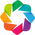

:Chord   [source,target]   (weight)

In [5]:

FA_matrices = [pd.read_csv(file, header=None) for file in
               glob.glob(os.path.join('structural_ready', "*.csv"))]

nodes_csv = pd.read_csv('nodes.csv', header=None)
nodes = nodes_csv[1].tolist()
node_dict = {i: name for i, name in enumerate(nodes)}

hv.extension('bokeh')
hv.output(size=300)

significant_strength_nodes = strengths_dict.keys()
significant_strength_nodes = [node - 1 for node in significant_strength_nodes]


adjacency_matrix = difference.values

# Get the number of nodes
num_nodes = adjacency_matrix.shape[0]

# Create a list to store edge information
edges = []

# Iterate over the upper triangle of the matrix
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if i in significant_strength_nodes and j in significant_strength_nodes:
            weight = adjacency_matrix[i, j]
            if weight > 0.11:
                # Append edge information to the list
                edges.append([node_dict[i], node_dict[j], weight])


# Create the edges_df DataFrame from the list of edges
edges_df = pd.DataFrame(edges, columns=['source', 'target', 'weight'])

chord = hv.Chord(edges_df)

# Customize Chord diagram appearance
chord.opts(
    opts.Chord(cmap='Blues', edge_color=dim('weight'), node_size=10, labels='index', 
               edge_alpha=0.8 , colorbar=True, node_marker='dot', colorbar_position='bottom', 
               node_nonselection_line_color='black', node_cmap='glasbey_cool', node_color=dim('index').str()) 
)

# Display the Chord diagram
chord

<h2>Brain areas</h2>

In [6]:
# We will first extract the coordinates of the nodes from the mindboggle file
# and we will add the values from our strength dictionary
node_file_path = 'Node_mindboggle_default.node'

# Read the .node file
with open(node_file_path, 'r') as file:
    lines = file.readlines()


# Modify the fourth value of each line based on the dictionary
for i, line in enumerate(lines):
    values = line.split()
    row_number = i+1
    new_strength = strengths_dict.get(row_number, 0)
    values[3] = str(new_strength)
    lines[i] = '\t'.join(values) + '\n'

# Write the updated content back to the file
with open('strengths.node', 'w') as file:
    file.writelines(lines)

In [7]:
# Then we extract the values we need: coordinates and strength values
node_file_path = 'strengths.node'

# Read the .node file
with open(node_file_path, 'r') as file:
    lines = file.readlines()

# Extract coordinates and values from each line
data = [line.split() for line in lines]
coordinates = np.array([list(map(float, line[:3])) for line in data])
values = [float(line[3]) for line in data]
names = [line[5] for line in data]

In [8]:
# Here we normalize values and we filter on a threshold,
# so that we use only the highest difference in strength value

from sklearn.preprocessing import MinMaxScaler

values_2d = [[val] for val in values]

# Normalize the values to the range [0, 1]
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values_2d)

# Extract the normalized values from the 2D array
normalized_values = [val[0] for val in normalized_values]

threshold_strength = [i if i>0.7 else 0.0 for i in normalized_values ]

print(threshold_strength)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.7190692470323279, 0.0, 0.7049630233930455, 0.8322908723969404, 0.0, 0.7892926061969069, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7442527866017729, 0.0, 0.0, 0.8540972209815576, 0.0, 0.0, 0.0, 0.8986304433175617, 0.0, 0.7316793658979084, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9527484008168985, 0.0, 0.0, 0.0, 0.0, 0.8369099627095606, 0.0, 0.0, 0.7631056267070847, 0.0, 0.0, 0.9113627862822798, 0.0, 0.77081061992209, 0.0, 0.7233376486199938, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7615725609830389, 0.0, 0.0, 0.0, 0.7492095205903929, 0.0, 0.0, 0.0, 0.8682209540375615, 0.0, 0.0, 0.0, 0.0]


In [9]:
strengths_df = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
strengths_df['strength_diff'] = threshold_strength
strengths_df['names'] = names
strengths_df

,x,y,z,strength_diff,names
0,-4.28,16.90,28.30,0.000000,ctx-lh-caudalanteriorcingulate
1,-35.20,12.00,46.50,0.000000,ctx-lh-caudalmiddlefrontal
2,-6.44,-87.50,25.50,0.000000,ctx-lh-cuneus
3,-22.20,-4.61,-35.80,0.000000,ctx-lh-entorhinal
4,-33.30,-41.70,-21.60,0.000000,ctx-lh-fusiform
...,...,...,...,...,...
71,24.90,-62.60,50.50,0.868221,ctx-rh-superiorparietal
72,54.50,-6.19,-6.22,0.000000,ctx-rh-superiortemporal
73,56.80,-28.40,31.60,0.000000,ctx-rh-supramarginal
74,46.00,-18.60,8.12,0.000000,ctx-rh-transversetemporal


In [10]:
# We subset the dataframe so that the nodes with zero value do not appear on the plot
filtered_strengths_df = strengths_df[strengths_df['strength_diff'] != 0.0]

(<Figure size 900x350 with 4 Axes>,
 [<Axes3D: title={'center': 'Left'}>,
  <Axes3D: title={'center': 'Superior'}>,
  <Axes3D: title={'center': 'Anterior'}>,
  <Axes: >])

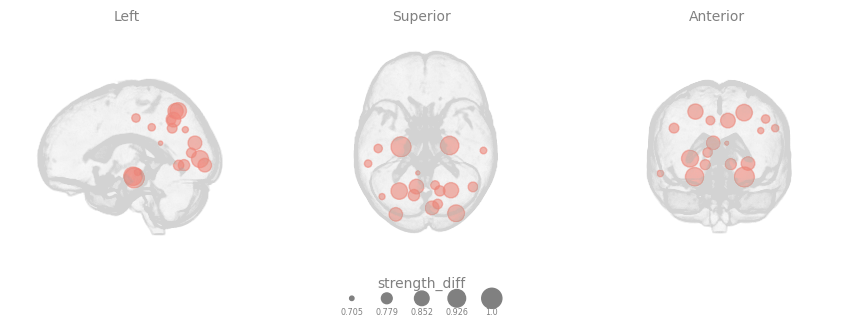

In [11]:
# We show the plot
# Value = 1 stands for max difference in strength 

import netplotbrain

netplotbrain.plot(
    template='MNI152NLin6Asym',
    template_style='glass',
    template_glass_maxalpha=0.1,
    nodes=filtered_strengths_df,
    node_size='strength_diff',
    node_alpha=0.6,
    arrowaxis=None,
    node_scale=200,
    view=['LSA'])

In [12]:
strength_differences = filtered_strengths_df[['strength_diff', 'names']].sort_values('strength_diff', ascending=False)
strength_differences

,strength_diff,names
35,1.000000,Left-Hippocampus
42,0.952748,Right-Hippocampus
53,0.911363,ctx-rh-lateraloccipital
26,0.898630,ctx-lh-superiorparietal
71,0.868221,ctx-rh-superiorparietal
22,0.854097,ctx-lh-precuneus
47,0.836910,ctx-rh-cuneus
8,0.832291,ctx-lh-lateraloccipital
10,0.789293,ctx-lh-lingual
55,0.770811,ctx-rh-lingual
